In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import wrangle

### Acquire the data

In [2]:
df = wrangle.getData('telco')

Let's look at the data a bit and check for datatypes and nulls

In [3]:
df.info() #no obvious nulls, odd that total charges is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

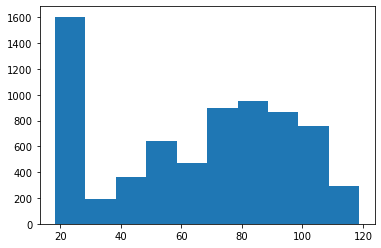

In [21]:
plt.hist(df.monthly_charges)

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

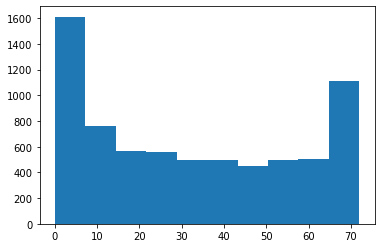

In [22]:
plt.hist(df.tenure)

Let's identify what columns are duplicates or have no other values

In [5]:
pd.crosstab(df.payment_type_id,df.payment_type) #can drop type ID

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [6]:
pd.crosstab(df.internet_service_type_id,df.internet_service_type) #can drop int ser type id

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [7]:
pd.crosstab(df.contract_type_id, df.contract_type) #drop contract type id

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [8]:
df.customer_id.nunique() #primary key, can drop.  Also means no duplicates

7043

### Notes on what I can drop so far:
- Payment type id, duplicate of payment type
- Internet service type id, duplicate of internet service type
- contract type id, duplicate of contract type
- Customer id, is a primery key, can drop

Looking at the next check of object columns

In [9]:
df.iloc[:,4:18] #need to encode these, but also check for list of values

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No


In [32]:
for i in df.columns[4:18]:
    print(df[i].unique())
#no vs no * service is important, as it is saying the column doesn't apply.  
#MAP: partner, dependents, phone service and paperless billing, encode the rest (except senior and tenure)

['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


In [33]:
for i in df.columns[4:18]:
    print(f'\n{df[i].value_counts()}')


Male      3549
Female    3483
Name: gender, dtype: int64

0    5890
1    1142
Name: senior_citizen, dtype: int64

No     3639
Yes    3393
Name: partner, dtype: int64

No     4933
Yes    2099
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Yes    6352
No      680
Name: phone_service, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: tec

**NOTE:** small subset don't have phone service (~9%)


Now check out that total charges column

In [11]:
type(df.total_charges[0]) #need to convert total charges to float

str

In [12]:
df.total_charges.sort_values() #Looks like there are some nulls

2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [13]:
df.total_charges.sort_values().head(20) #about 10-15

2855           
3118           
3052           
5433           
1731           
4054           
2176           
2250           
945            
1906           
2025           
4386      100.2
2222     100.25
1771     100.35
5542      100.4
5126      100.8
3315      100.9
5762     1001.2
4983     1001.5
4764    1003.05
Name: total_charges, dtype: object

In [14]:
#They aren't null so they may have spaces, stripping
df2 = df.total_charges.str.strip()
df2[df2==''] #there's our null(ish) subset!

945     
1731    
1906    
2025    
2176    
2250    
2855    
3052    
3118    
4054    
5433    
Name: total_charges, dtype: object

In [15]:
df2[df2 == ''].index #how to grab index values for dropping

Int64Index([945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433], dtype='int64')

continuing through the columns

In [16]:
df.churn.unique() #encode

array(['No', 'Yes'], dtype=object)

In [17]:
df.signup_date

0       2021-04-21 18:07:34
1       2021-04-21 18:07:34
2       2021-09-21 18:07:34
3       2020-12-21 18:07:34
4       2021-10-21 18:07:34
               ...         
7038    2020-12-21 18:07:34
7039    2020-03-21 18:07:34
7040    2021-11-21 18:07:34
7041    2016-06-21 18:07:34
7042    2016-10-21 18:07:34
Name: signup_date, Length: 7043, dtype: object

In [18]:
df.tenure #Keep this as opposed to signup_date

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    67
7042    63
Name: tenure, Length: 7043, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [20]:
for i in df.columns[21:24]:
    print(df[i].unique())
#encode these

['DSL' 'Fiber optic' 'None']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [34]:
for i in df.columns[21:24]:
    print(f'\n{df[i].value_counts()}')
#decent split on these


Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

Month-to-month    3875
Two year          1685
One year          1472
Name: contract_type, dtype: int64

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_type, dtype: int64


### Summary of cleaning to do:
- Total_Charges:
  - Drop rows w/ nulls in total_charges (strip, check for '', grab index)
  - Convert to float
- To Drop:
  - Payment type id, duplicate of payment type
  - Internet service type id, duplicate of internet service type
  - contract type id, duplicate of contract type
  - Customer id, is a primery key, can drop
  - signup_date, tenure is sufficient
- To Encode/Map:
  - Map yes/no:
      - partner, dependents, phone_service, paperless_billing,  churn, 
  - Encode:
    - 'gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','internet_service_type','contract_type','payment_type'
  

#### Start cleaning

In [23]:
#strip total charges, check for empty cells, and store the indexes
drp_ind = df[df.total_charges.str.strip() == ''].index

In [24]:
df.shape

(7043, 25)

In [25]:
#drop those rows
df.drop(index=drp_ind,inplace=True)

In [26]:
df.shape #looks like the 10-15 I expected

(7032, 25)

In [27]:
df.total_charges.sort_values() #awesome, don't see those nulls

4386     100.2
2222    100.25
1771    100.35
5542     100.4
5126     100.8
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7032, dtype: object

In [28]:
#convert
df.total_charges = df.total_charges.astype(float)

In [29]:
df.total_charges.dtype #Total charges is ready!

dtype('float64')

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

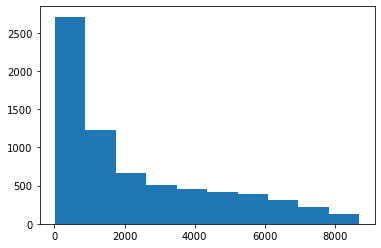

In [30]:
plt.hist(df.total_charges)

In [ ]:
#now drop unnecessary columns
#columns to drop
drp_col = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id','signup_date']

In [ ]:
df.drop(columns = drp_col,inplace=True)

In [ ]:
df.shape #5 less columns

In [ ]:
#map subset of variables that are yes/no
#phone_service, paperless_billing, partner, dependents, churn
df['has_phone'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['is_paperless'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['has_dependents'] = df.partner.map({'Yes': 1, 'No': 0})
df['has_partner'] = df.dependents.map({'Yes': 1, 'No': 0})
df['has_churned'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
df.columns

In [ ]:
#encode the other categories
#identify columns
enc_col = ['gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','payment_type','contract_type','internet_service_type']

In [ ]:
#create encoded columns
d_df = pd.get_dummies(df[enc_col],drop_first=True)

In [ ]:
#concat to the rest of the df
df = pd.concat([df,d_df],axis=1)

In [ ]:
df.shape #lots of columns

In [ ]:
df.columns

##### Dropped into a function and testing

In [ ]:
#### TELCO PREP ####
def prep_telco(df,**kwargs):
  #HANDLE total_charge row: 
  #grab the indices with null values
  drp_ind = df[df.total_charges.str.strip() == ''].index
  #drop those indices
  df.drop(index=drp_ind,inplace=True)
  #Convert the column to float
  df.total_charges = df.total_charges.astype(float)

  #DROP unnecessary columns
  drp_col = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id','signup_date']
  df.drop(columns = drp_col,inplace=True)
  #MAP subset of variables that are yes/no
  #phone_service, paperless_billing, partner, dependents, churn
  df['has_phone'] = df.phone_service.map({'Yes': 1, 'No': 0})
  df['is_paperless'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
  df['has_dependents'] = df.partner.map({'Yes': 1, 'No': 0})
  df['has_partner'] = df.dependents.map({'Yes': 1, 'No': 0})
  df['has_churned'] = df.churn.map({'Yes': 1, 'No': 0})   

  #ENCODE the other categorical columns
  enc_col = ['gender', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','payment_type','contract_type','internet_service_type']
  d_df = pd.get_dummies(df[enc_col],drop_first=True)
  #concate encoded df to rest of df
  df = pd.concat([df,d_df],axis=1)

  return df

In [ ]:
df = wrangle.getData('telco')
df.info()

In [ ]:
df = prep_telco(df)
df.info()

##### has the correct number of rows and columns, total charges is float

##### Now work on splitting

In [ ]:
#split test/train and validate - this order makes the ratios easier 
#define the target variable
target = 'churn'
#test and validation percentages of WHOLE dataset
val_per = .2
test_per = .1
#Calculate percentage we need of test/train subset
tt_per = test_per/(1-val_per)

#returns train then test, so test_size is the second set it returns
tt, validate = train_test_split(df, test_size=val_per,random_state=88,stratify=df[target])
#now split tt in train and test want 70/10 so test_size = 1/8 or .125
train, test = train_test_split(tt, test_size=tt_per, random_state=88,stratify=tt[target])

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
validate.shape

##### Make into a splitting function and call from prep.  See in wrangle.py.


##### Moving on to EDA workbook